In [5]:
import numpy as np
import pandas as pd

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/Users/ranmarusato/.matplotlib/matplotlibrc", line #629
  (fname, cnt))


In [131]:
class ScratchLinearRegression():
    """
    線形回帰
    ＊コンストラクタ（__init__）のパラメータはここに書いておくと分かりやすい

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """
#     num_iter = 3000
#     lr= 0.01

    def __init__(self, num_iter, lr):
        #メソッド内で共有したい変数をおlく
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
#         self.bias = bias
#         self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        #predictで使う重み
        self.theta =  np.random.rand(2)


    def compute_cost(self,X,y):
        y_hat= np.dot(self.theta,X.T)
        loss = np.sum((y_hat - 2)**2)/(len(X)*2)
        return loss
    
    def  _gradient_descent(self,X,y):
            theta = np.random.rand(X.shape[1])
           #訓練データの誤差
            past_costs = []
            #バリデーションデータの誤差
#             val_past_costs =[]
            #重み
            past_thetas = []
            #平均二乗和誤差を計算する
            loss = self.compute_cost(X,y)
            #バリデーションデータの平均２乗和誤差
#             val_loss = compute_cost(x_val,y_val,theta)
            #追加
            past_costs.append(loss)
#             val_past_costs.append(val_loss)
            #追加
            past_thetas.append(self.theta)

            for i in range(self.iter):
                #仮定関数
                y_hat = np.dot(X, self.theta)
#                 val_y_hat =  np.dot(x_val, theta)
                #パラメータの更新式
                self.theta =self. theta - (self.lr/len(y)) * np.dot(X.T, y_hat - y)
                # 訓練データの誤差を計算する
                self.loss = self.compute_cost(X,y)
                #訓練データの誤差を格納する
                past_costs.append(loss)
                #バリデーションデータの誤差を計算する
#                 val_loss = compute_cost(x_val,y_val,theta)
                #バリデーションデータの誤差を格納する
#                 val_past_costs.append(val_loss)
                past_thetas.append(theta)

            self.loss = past_costs
            self.theta = past_thetas


    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        self._gradient_descent(X,y)
#         if self.verbose:
#             #verboseをTrueにした際は学習過程を出力
#             print()
        
        
    #返す値は他で使わないのでリターンで返す
    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
    
        
        return np.dot(self.theta,np.array(X).T)

In [132]:
model = ScratchLinearRegression(num_iter=2000, lr=0.001)

In [133]:
train = pd.read_csv('../train.csv')

In [134]:
X = train.loc[:,['GrLivArea','YearBuilt']]

In [135]:
y = train['SalePrice']

In [136]:
model.fit(X,y)

/Users/ranmarusato/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in square
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in subtract


In [78]:
test = pd.read_csv('../test.csv')
test = test.loc[:,['GrLivArea','YearBuilt']]

In [143]:
iris = pd.read_csv('../iris.csv')

In [179]:
index = (iris['Species'][iris['Species']=='Iris-versicolor'].index)
index = index.append( iris['Species'][iris['Species']=='Iris-virginica'].index)
iris = iris.iloc[index]

IndexError: positional indexers are out-of-bounds

In [ ]:
class ScratchLogisticRegression():


    def __init__(self, num_iter, lr):
        #メソッド内で共有したい変数をおlく
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        #predictで使う重み
        self.theta =  np.random.rand(2)

    def compute_cost(self,X,y):
        y_hat= np.dot(self.theta,X.T)
        loss = np.sum((y_hat - 2)**2)/(len(X)*2)
        return loss
    
    def  _gradient_descent(self,X,y):
            theta = np.random.rand(X.shape[1])
           #訓練データの誤差
            past_costs = []

            #重み
            past_thetas = []
            #平均二乗和誤差を計算する
            loss = self.compute_cost(X,y)

            #追加
            past_costs.append(loss)

            #追加
            past_thetas.append(self.theta)

            for i in range(self.iter):
                #仮定関数
                y_hat = np.dot(X, self.theta)

                #パラメータの更新式
                self.theta =self. theta - (self.lr/len(y)) * np.dot(X.T, y_hat - y)
                # 訓練データの誤差を計算する
                self.loss = self.compute_cost(X,y)
                #訓練データの誤差を格納する
                past_costs.append(loss)

                past_thetas.append(theta)

            self.loss = past_costs
            self.theta = past_thetas


    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        self._gradient_descent(X,y)
#         if self.verbose:
#             #verboseをTrueにした際は学習過程を出力
#             print()
        
        
    #返す値は他で使わないのでリターンで返す
    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
    
        
        return np.dot(self.theta,np.array(X).T)

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


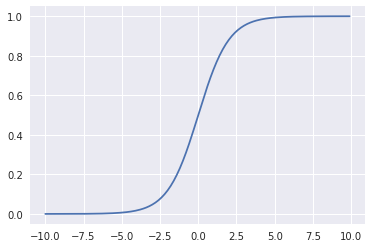

In [171]:
plt.plot(x, y)
plt.show()

In [337]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [336]:
X = X.drop('Id',axis=1)

In [168]:
x = np.arange(-10,10,0.1)
y = sigmoid(x)

In [170]:
import matplotlib.pyplot as plt
import math
import seaborn as sns 
sns.set
%matplotlib inline

In [249]:
for  i in range(-10,11):
    print(sigmoid(i))

4.539786870243442e-05
0.0001233945759862318
0.00033535013046647827
0.0009110511944006456
0.002472623156634775
0.006692850924284857
0.017986209962091562
0.04742587317756679
0.11920292202211757
0.2689414213699951
0.5
0.7310585786300049
0.8807970779778823
0.9525741268224331
0.9820137900379085
0.9933071490757153
0.9975273768433653
0.9990889488055994
0.9996646498695336
0.9998766054240137
0.9999546021312976


$ h_θ(x) = g(θ^T x).\\ $

$ g(z) = \frac{1}{1+e^{−z}}.\\ $

$ J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] +
\frac{λ}{2m}\sum_{j=1}^n
θ^2_j.\\ $

$ h_θ(x) = g(θ^T x).\\ $

In [399]:
theta

array([0.8810341 , 0.39778789, 0.34284467, 0.51497124])

In [401]:
X.shape

(100, 4)

In [386]:
def y_hat(X,theta):
    #y =  sigmoid(np.dot(theta,　X.T))
    #仮定関数は、シグモイド関数の引数にθxを入れたもの
    #theta= 4列
    #X = 100*4
    #(1*4 ) *(4*100)
    # 100
    y = sigmoid(np.dot(theta,X.T))
    return y

In [453]:
y_hat(X,theta)

array([0.999943  , 0.99990164, 0.99994256, 0.99959102, 0.99989796,
       0.99976318, 0.99990845, 0.99901129, 0.99990047, 0.99955343,
       0.99900887, 0.99981664, 0.99968026, 0.9998581 , 0.99966165,
       0.99991438, 0.99978452, 0.99969796, 0.99982539, 0.99960326,
       0.99988187, 0.99980238, 0.99987628, 0.99983632, 0.99986844,
       0.9999027 , 0.99992299, 0.99993785, 0.99984236, 0.99957842,
       0.99953344, 0.99949167, 0.99970818, 0.99986802, 0.99974301,
       0.99987727, 0.99992663, 0.99982375, 0.99972605, 0.99962229,
       0.99966679, 0.99985887, 0.99970657, 0.99905789, 0.99970173,
       0.99974479, 0.99974776, 0.99984309, 0.99916124, 0.99972838,
       0.99996312, 0.99986512, 0.99997388, 0.99992887, 0.99995645,
       0.99998678, 0.99956066, 0.99997682, 0.99994526, 0.99998569,
       0.99994332, 0.99992576, 0.99996098, 0.99984322, 0.9998998 ,
       0.99995048, 0.99994069, 0.99999192, 0.99998844, 0.99982456,
       0.99997221, 0.99984274, 0.99998666, 0.9999021 , 0.99996

$ g(z) = \frac{1}{1+e^{−z}}.\\ $

In [413]:
def sigmoid(X):
    y = 1.0 / (1.0 + np.exp(-X))
    return y

$ J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] +
\frac{λ}{2m}\sum_{j=1}^n
θ^2_j.\\ $

In [414]:
sigmoid(np.dot(theta,X.T)).size

100

# シグマの中身　第一項

In [388]:
np.dot((1-y),np.log(1-y_hat(X.values,theta)))

ValueError: shapes (100,) and (200,) not aligned: 100 (dim 0) != 200 (dim 0)

In [415]:
np.log(1-y_hat(X.values,theta)).shape

(100,)

In [392]:
(1-y).size

100

In [407]:
y_hat(X.values,theta).shape

(200,)

In [416]:
np.dot((-1 * y), np.log(y_hat(X.values, theta)))

0.0034502875835681628

In [443]:
def compute_cost(X,y,theta,λ= 0.01):
    X = np.array(X)
    y = np.array(y)
    # 第１項
    one_one = np.dot((-1 * y), np.log(y_hat(X,theta)))
    one_two = np.dot((1-y),np.log(1-  y_hat(X,theta)))
    one = 1/len(X)*(one_one- one_two)
    two = (λ/2*len(X))*sum(theta**2)
    return one+two

In [442]:
 compute_cost(X,y,theta)

4.896299630187513

In [428]:
 one_one = np.dot((-1 * y), np.log(y_hat(X,theta)))

In [429]:
 np.dot((-1 * y), np.log(y_hat(X,theta)))

0.0034502875835681628

In [430]:
 one_two = np.dot((1-y),np.log(1- sigmoid()))

In [431]:
np.dot((1-y),np.log(1- sigmoid(X)))

array([-296.94971211, -141.67888516, -213.78614606,  -78.23388054])

In [433]:
(1-y).shape

(100,)

In [440]:
np.log(1- y_hat(X,theta))

array([ -9.77254667,  -9.22689577,  -9.76473098,  -7.80185008,
        -9.19017217,  -8.34820098,  -9.2986304 ,  -6.91910591,
        -9.21505761,  -7.71390528,  -6.91666552,  -8.60405275,
        -8.0480077 ,  -8.86036453,  -7.99141771,  -9.36563287,
        -8.44262805,  -8.10496159,  -8.65297731,  -7.83222012,
        -9.04374326,  -8.52915307,  -8.99750406,  -8.71761327,
        -8.93602942,  -9.23776235,  -9.47152918,  -9.68602879,
        -8.75520505,  -7.77149218,  -7.6701233 ,  -7.5843835 ,
        -8.13937668,  -8.93282574,  -8.26646275,  -9.0055612 ,
        -9.51997115,  -8.64358244,  -8.20255442,  -7.88137639,
        -8.0067514 ,  -8.86585807,  -8.13388397,  -6.96738389,
        -8.11752684,  -8.27342642,  -8.28514178,  -8.75984795,
        -7.08358515,  -8.21109792, -10.20774792,  -8.91111319,
       -10.5529551 ,  -9.55104927, -10.04156473, -11.23345053,
        -7.73022841, -10.6720267 ,  -9.8129003 , -11.15427687,
        -9.77814991,  -9.50824193, -10.1515199 ,  -8.76

In [458]:
def  gradient_descent(X,y,theta):
        theta = np.random.rand(X.shape[1])
        X = np.array(X)
        y = np.array(y)
        lr = 0.0001
       #訓練データの誤差
        past_costs = []
        #重み
        past_thetas = []
        #平均二乗和誤差を計算する
        loss = compute_cost(X,y,theta)
        #追加
        past_costs.append(loss)
        #追加
        past_thetas.append(theta)

        for i in range(5000):
            #仮定関数
            y_h=y_hat(X,theta)

            #パラメータの更新式
            theta = theta - lr *(1/len(y))*(X.T.dot(y_h-y))
            cost = (compute_cost(X,y,theta))
            # 訓練データの誤差を計算する
            loss = compute_cost(X,y,theta)
            #訓練データの誤差を格納する
            past_costs.append(loss)
            past_thetas.append(theta)

        loss = past_costs
        theta = past_thetas
        
        return  past_thetas,past_costs


In [459]:
past_thetas,past_costs = gradient_descent(X,y,theta)

In [460]:
compute_cost(X,y,theta)

4.896299630187513

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


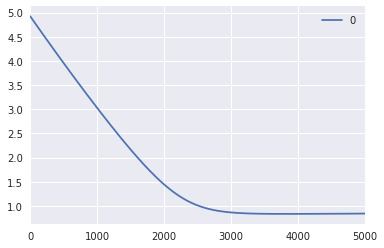

In [461]:
pd.DataFrame(past_costs).plot.line()

In [340]:
np.log(1- sigmoid(X.values))

array([[-7.00091147, -3.23995333, -4.70905416, -1.62041741],
       [-6.40166018, -3.23995333, -4.51104774, -1.70141328],
       [-6.90100728, -3.14406397, -4.90741899, -1.70141328],
       [-5.50407844, -2.39554546, -4.01814993, -1.54100845],
       [-6.50150231, -2.85903283, -4.61000165, -1.70141328],
       [-5.70334038, -2.85903283, -4.51104774, -1.54100845],
       [-6.30183462, -3.33621926, -4.70905416, -1.78390074],
       [-4.90741899, -2.48683615, -3.33621926, -1.31326169],
       [-6.60135944, -2.95356278, -4.61000165, -1.54100845],
       [-5.2055014 , -2.76504356, -3.92003977, -1.62041741],
       [-5.00671535, -2.12692801, -3.52975042, -1.31326169],
       [-5.9027357 , -3.04858735, -4.21488425, -1.70141328],
       [-6.00247569, -2.30508332, -4.01814993, -1.31326169],
       [-6.10224036, -2.95356278, -4.70905416, -1.62041741],
       [-5.60369104, -2.95356278, -3.62695709, -1.54100845],
       [-6.70123015, -3.14406397, -4.41220258, -1.62041741],
       [-5.60369104, -3.

In [268]:
np.dot((1-y),np.log(1- sigmoid(X)))

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([          nan, -296.94971211, -141.67888516, -213.78614606,
        -78.23388054])

In [229]:
np.dot(-y,np.log(X))  - np.dot((1-y),np.log(1- sigmoid(X)))

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([-246.28073029,  -99.03271723,  -59.20899129,  -90.47130099,
        -39.8373877 ])

In [231]:
(np.dot(-y,np.log(X))  - np.dot((1-y),np.log(1- sigmoid(X))))

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


nan

In [224]:
1/len(X)*np.sum(np.dot(-y,np.log(X))  - np.dot((1-y)*np.log(1- sigmoid(X))))

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/pandas/core/indexes/base.py:2984: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


TypeError: Required argument 'b' (pos 2) not found

In [205]:
X = iris.drop('Species',axis=1)
y = iris['Species']
theta = np.random.rand(X.shape[1])

In [200]:
mapping = {'Iris-versicolor':0,'Iris-virginica':1}

In [203]:
iris.Species = iris.Species.map(mapping)

In [234]:
a = np.dot(-y,np.log(X))  - np.dot((1-y),np.log(1- sigmoid(X)))

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [471]:
def predict(X):
    return np.dot(past_thetas[-1],X.T)
    

In [491]:
def predict_probs(X,theta):
    pred = y_hat(X,theta)
    return pred


def predict( X,theta,threshold=0.5):
    pred = y_hat(X,theta) >= 0.5
    return pred*1

In [496]:
# 決定境界
# http://umashika5555.hatenablog.com/entry/2017/06/25/070826

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])